In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk
from nltk.stem import PorterStemmer
import matplotlib.ticker as mtick
from urllib.parse import urlparse

In [50]:
df_train = pd.read_csv('train.csv')

In [51]:
df_train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [52]:
df_train.shape

(7613, 5)

# Relación entre los tweets que tienen links y la veracidad de los mismos

In [53]:
def hasLinks(string): 
    links = re.findall("http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\), ]|(?:%[0-9a-fA-F][0-9a-fA-F]))+", string) 
    return len(links) > 0

In [54]:
df = df_train
df['has_links'] = 0
df['has_links'] = df['text'].apply(hasLinks)
df

,id,keyword,location,text,target,has_links
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,False
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,False
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,False
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,False
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,False
...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,True
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1,False
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,True
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1,False


In [55]:
df = df.groupby(['target','has_links']).count()
df

id  keyword  location  text
target has_links                               
0      False      2543     2525      1635  2543
       True       1799     1798      1249  1799
1      False      1099     1076       729  1099
       True       2172     2153      1467  2172

In [56]:
df.index = ['falso sin link','falso con link','real sin link','real con link']
df

,id,keyword,location,text
falso sin link,2543,2525,1635,2543
falso con link,1799,1798,1249,1799
real sin link,1099,1076,729,1099
real con link,2172,2153,1467,2172


In [57]:
df = df.reindex(index = ['falso sin link','real sin link','falso con link','real con link']).reset_index()
df

,index,id,keyword,location,text
0,falso sin link,2543,2525,1635,2543
1,real sin link,1099,1076,729,1099
2,falso con link,1799,1798,1249,1799
3,real con link,2172,2153,1467,2172


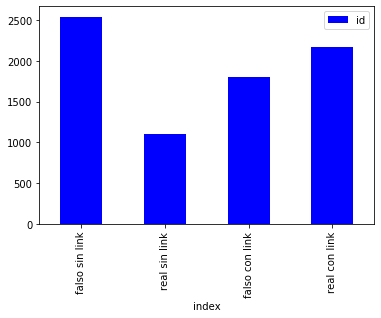

In [58]:
#color = 4*['blue']

df.plot(kind='bar',x='index',y='id', color='b')
plt.show()